<h1>Import Pandas</h1>

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('wine.txt',sep=',')
wine.head()

,Cultivar,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids_Phenols,Proanthicyanins,Color_Intensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = wine[['Alcohol', 'Color_Intensity']].values
y = wine['Cultivar'].values

In [4]:
from sklearn import cluster

cls_wine = cluster.KMeans(n_clusters = 3)
cls_wine = cls_wine.fit(X)

In [5]:
print(cls_wine.labels_)

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 0 2 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


In [6]:
print(cls_wine.cluster_centers_)

[[13.38472222  8.74611108]
 [13.45168831  5.19441558]
 [12.25353846  2.854     ]]


In [7]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,cls_wine.labels_))

0.5097267872581326


<AxesSubplot:>

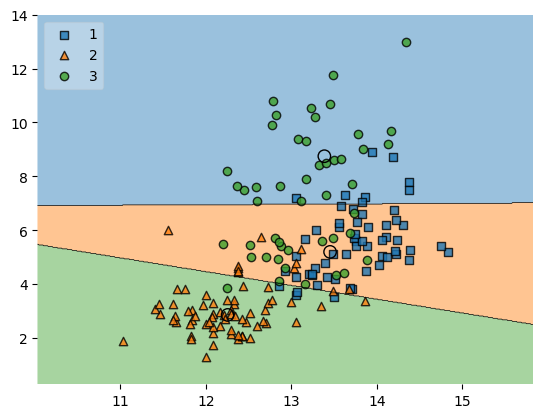

In [8]:
from mlxtend.plotting import plot_decision_regions
#y_train_new = y_train.to_numpy()
plot_decision_regions(X,y,clf=cls_wine,legend=2,X_highlight=cls_wine.cluster_centers_)

C:\Users\ppatankar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


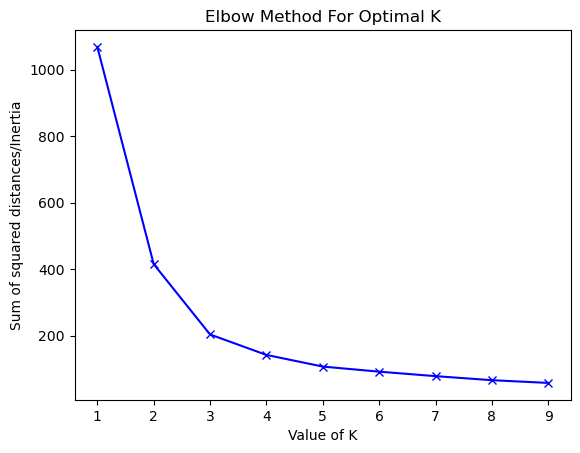

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans= KMeans(n_clusters=num_clusters)
    #X is the dataframe
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Value of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal K')
plt.show()